# Movies Sentiment Analysis 


### Import necessary Libraries


In [1]:

import os
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Step 1: Download NLTK stopwords data

In [2]:
# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yassa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Step 2: Read the data

In [3]:

# Step 2: Read the data
def read_data(folder):
    texts = []
    labels = []
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            text = f.read()
            texts.append(text)
            labels.append(1 if folder == 'positive' else 0)
    return texts, labels


### Step 3: Preprocess the text data

In [4]:

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization (split text into words) before stemming
    tokens = nltk.word_tokenize(text)

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Apply stemming after lemmatization
    tokens = [stemmer.stem(word) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

### Step 4: Apply TF-IDF Vectorization and train a classifier

In [5]:

# Step 4: Apply TF-IDF Vectorization and train a classifier
def train_classifier(pos_folder, neg_folder):
    # Read the data
    pos_texts, pos_labels = read_data(pos_folder)
    neg_texts, neg_labels = read_data(neg_folder)
    all_texts = pos_texts + neg_texts
    all_labels = pos_labels + neg_labels

    # Print #numbers of pos and neg samples
    print("Number of positive samples:", len(pos_texts))
    print("Number of negative samples:", len(neg_texts))

    # Preprocess all texts
    preprocessed_texts = [preprocess_text(text) for text in all_texts]

    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the preprocessed data
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)
    print("TF-IDF Matrix shape: ", tfidf_matrix.shape)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, all_labels, test_size=0.2, random_state=42)

    # Initialize and train the Logistic Regression classifier
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train, y_train)

    # Predict on the test set with Logistic Regression
    y_pred_lr = lr_classifier.predict(X_test)

    # Evaluate the Logistic Regression classifier
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    report_lr = classification_report(y_test, y_pred_lr)
    conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

    # Initialize and train the SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    # Predict on the test set with SVM
    y_pred_svm = svm_classifier.predict(X_test)

    # Evaluate the SVM classifier
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    report_svm = classification_report(y_test, y_pred_svm)
    conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

    return lr_classifier, accuracy_lr, report_lr, conf_matrix_lr, svm_classifier, accuracy_svm, report_svm, conf_matrix_svm


### Visualize Results

In [6]:


# Visualize confusion matrix
def visualize_confusion_matrix(conf_matrix, classifier_type):
    labels = ['Negative', 'Positive']
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    if classifier_type == "Logistic Regression":
        plt.title('Confusion Matrix for Logistic Regression')
    elif classifier_type == "SVM":
        plt.title('Confusion Matrix for SVM')
    plt.show()



In [7]:

pos_folder = "positive"
neg_folder = "negative"
lr_classifier, accuracy_lr, report_lr, conf_matrix_lr, svm_classifier, accuracy_svm, report_svm, conf_matrix_svm = train_classifier(pos_folder, neg_folder)


Number of positive samples: 1000
Number of negative samples: 1000
TF-IDF Matrix shape:  (2000, 31079)


### Logistic Regression Classifier

In [14]:

print("Logistic Regression Classifier Accuracy:", accuracy_lr)
print("Classification Report (Logistic Regression):")
print(report_lr)


Logistic Regression Classifier Accuracy: 0.81
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       201
           1       0.80      0.82      0.81       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



### SVM Classifier

In [13]:

print("\nSupport Vector Machine Classifier Accuracy:", accuracy_svm)
print("Classification Report (Support Vector Machine):")
print(report_svm)



Support Vector Machine Classifier Accuracy: 0.8325
Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       201
           1       0.82      0.84      0.83       199

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400




Confusion Matrix (Logistic Regression):


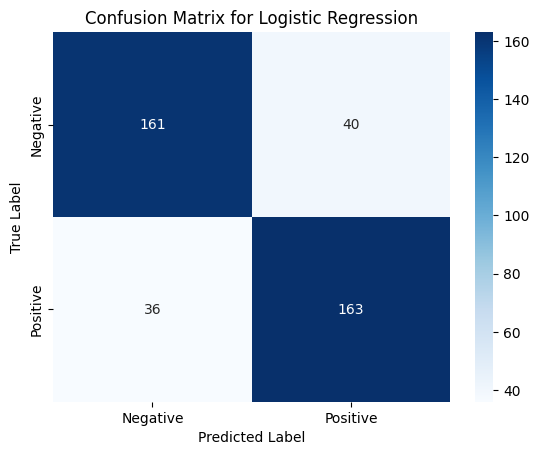

In [12]:

# Visualize the confusion matrix for Logistic Regression
print("\nConfusion Matrix (Logistic Regression):")
visualize_confusion_matrix(conf_matrix_lr, "Logistic Regression")



Confusion Matrix (Support Vector Machine):


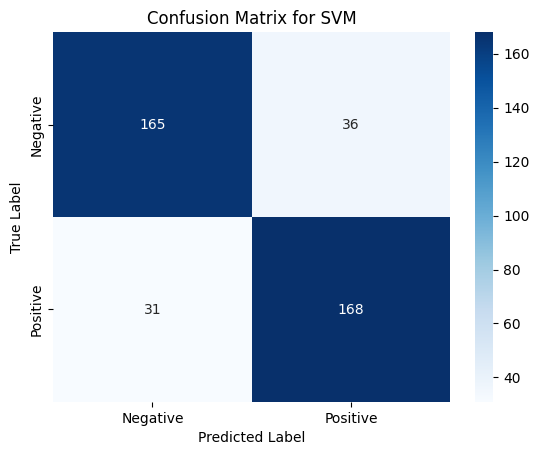

In [11]:

# Visualize the confusion matrix for SVM
print("\nConfusion Matrix (Support Vector Machine):")
visualize_confusion_matrix(conf_matrix_svm, "SVM")


# Thank you